In [187]:
import pandas as pd
import numpy as np
import scipy as sp
import matplotlib as plt

import processing_helpers as proc

In [188]:
scope_file = "scope_readout/nbiot_test1_coap_psm5min1.csv"

#Getting the amount of points in each segment
head = pd.read_csv(scope_file, header = [0,1])

#Getting the rest of the data
data = pd.read_csv(scope_file, header = [1], skiprows = [2])
data.columns = ["time","voltage drop"]

data

,time,voltage drop
0,-0.250000,0.006250
1,-0.249935,0.004980
2,-0.249870,0.006250
3,-0.249805,0.006250
4,-0.249740,0.006250
...,...,...
191995,1232.154387,0.003711
191996,1232.154452,0.003711
191997,1232.154517,0.002441
191998,1232.154582,0.001172


In [189]:
#Number of segments:
segments_n = int(len(data.index)/seg_points)
print(segments_n)

#Dividing data into segments
segments = []

for i in range(segments_n):
    segments.append(data.iloc[i*seg_points:(i+1)*seg_points])
    
segments[24]


25


,time,voltage drop
184320,1231.654712,0.003711
184321,1231.654777,0.004980
184322,1231.654842,0.004980
184323,1231.654907,0.004980
184324,1231.654972,0.004980
...,...,...
191995,1232.154387,0.003711
191996,1232.154452,0.003711
191997,1232.154517,0.002441
191998,1232.154582,0.001172


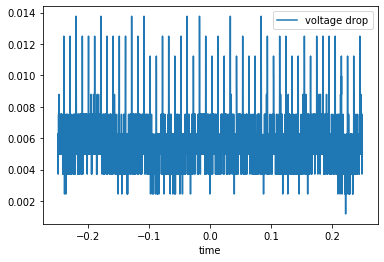

In [194]:
data.iloc[0:seg_points].plot(x="time",y="voltage drop")

In [191]:
#Timestep of measurements:
time_acc = 0;
for i in range(seg_points-1):
    time_acc += (data.time.iloc[i])
timestep = round(abs(time_acc/seg_points),6)
print(timestep)

6.5e-05
